Follow the tutorial:

- https://thinkingneuron.com/how-to-classify-text-using-word2vec/

## Reading the support ticket data

In [1]:
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
 
# Reading the data
TicketData=pd.read_csv('./data/supportTicketData.csv')
 
# Printing number of rows and columns
print(TicketData.shape)
 
# Printing sample rows
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


### Visualising the distribution of the Target variable

urgency
P1    6748
P2    5528
P3    7520
dtype: int64


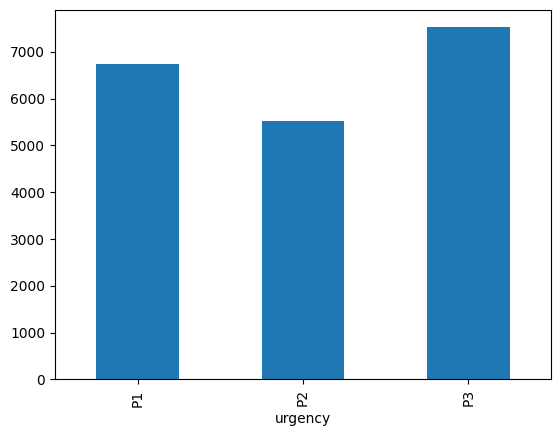

In [2]:
# Number of unique values for urgency column
# You can see there are 3 ticket types
print(TicketData.groupby('urgency').size())
 
# Plotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar');

### Count Vectorization: converting text data to numeric
This step will help to remove all the stopwords and create a document term matrix.

We will use this matrix to do further processing. For each word in the document term matrix, we will use the Word2Vec numeric vector representation.

In [3]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
corpus = TicketData['body'].values

# Creating the vectorizer
vectorizer = CountVectorizer(stop_words='english')

# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)

#print(vectorizer.get_feature_names())

# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
CountVectorizedData['Priority']=TicketData['urgency']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2


### Word2Vec conversion:
Now we will use the Word2Vec representation of words to convert the above document term matrix to a smaller matrix, where the columns are the sum of the vectors for each word present in the document.

For example, look at the below diagram. The flow is shown for one sentence, the same happens for every sentence in the corpus.

The numeric representation of each word is taken from Word2Vec.
All the vectors are added, hence producing a single vector
That single vector represents the information of the sentence, hence treated as one row.

In [6]:
import gensim
#Loading the word vectors from Google trained word2Vec model
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [8]:
# Each word is a vector of 300 numbers
GoogleModel['hello'].shape

(300,)

In [9]:
GoogleModel['hello']

array([-0.05419922,  0.01708984, -0.00527954,  0.33203125, -0.25      ,
       -0.01397705, -0.15039062, -0.265625  ,  0.01647949,  0.3828125 ,
       -0.03295898, -0.09716797, -0.16308594, -0.04443359,  0.00946045,
        0.18457031,  0.03637695,  0.16601562,  0.36328125, -0.25585938,
        0.375     ,  0.171875  ,  0.21386719, -0.19921875,  0.13085938,
       -0.07275391, -0.02819824,  0.11621094,  0.15332031,  0.09082031,
        0.06787109, -0.0300293 , -0.16894531, -0.20800781, -0.03710938,
       -0.22753906,  0.26367188,  0.012146  ,  0.18359375,  0.31054688,
       -0.10791016, -0.19140625,  0.21582031,  0.13183594, -0.03515625,
        0.18554688, -0.30859375,  0.04785156, -0.10986328,  0.14355469,
       -0.43554688, -0.0378418 ,  0.10839844,  0.140625  , -0.10595703,
        0.26171875, -0.17089844,  0.39453125,  0.12597656, -0.27734375,
       -0.28125   ,  0.14746094, -0.20996094,  0.02355957,  0.18457031,
        0.00445557, -0.27929688, -0.03637695, -0.29296875,  0.19

### Finding Similar words
This is one of the interesting features of Word2Vec. You can pass a word and find out the most similar words related to the given word.

In the below example, you can see the most relatable word to “king” is “kings” and “queen”. This was possible because of the context learned by the Word2Vec model. Since words like “queen” and “prince” are used in the context of “king”. the numeric word vectors for these words will have similar numbers, hence, the cosine similarity score is high.

In [10]:
# Finding similar words
# The most_similar() function finds the cosine similarity of the given word with 
# other words using the word2Vec representations of each word
GoogleModel.most_similar('king', topn=5)

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474)]

In [11]:
# Checking if a word is present in the Model Vocabulary
'Hello' in GoogleModel.key_to_index.keys()

True

In [15]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns[:-1]
 
# Printing sample words
WordsVocab

Index(['ab', 'abandon', 'abandoned', 'abc', 'abeam', 'abilities', 'ability',
       'able', 'abnormal', 'abnormally',
       ...
       'zeus', 'zig', 'zip', 'zipped', 'zipper', 'zipping', 'zone', 'zones',
       'zoom', 'zooming'],
      dtype='object', length=9099)

In [18]:
CountVectorizedData.shape[0]

19796

In [30]:
CountVectorizedData.iloc[1,:-1]==1

ab           False
abandon      False
abandoned    False
abc          False
abeam        False
             ...  
zipping      False
zone         False
zones        False
zoom         False
zooming      False
Name: 1, Length: 9099, dtype: bool

###  Converting every sentence to a numeric vector
For each word in a sentence, we extract the numeric form of the word and then simply add all the numeric forms for that sentence to represent the sentence.


Keypoint of this step :
- In order to do transfer learning from pretrained googlenews vector, we need to make sure that in each row of input data, each text para including many words, and each word should has the same dimensions as word in googlenews data.

In [34]:
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVecData.shape[0]):

        # initiating a sentence with all zeros
        Sentence = np.zeros(300)

        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector. In each row, if the value of the word == 1, and the word is in the list of googledata,
        # we add the corresponding vector of googledata to the sentence.
        for word in WordsVocab[CountVecData.iloc[i,:]==1]:
            #print(word)
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [35]:
WordsVocab[CountVectorizedData.iloc[1,:-1]==1]

Index(['blank', 'fallowing', 'help', 'hi', 'link', 'proceed', 'thanks'], dtype='object')

In [36]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(TicketData['body'])
 
# Checking the new representation for sentences
W2Vec_Data.shape

(19796, 300)

Now we will have the new data with the format of googlenews data(300 dimensions). Each row corresponding to input sentence which as the same dimensions as googlenews data

In [37]:
W2Vec_Data

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.075928,1.106567,0.354614,1.532471,-1.502838,0.140747,0.017517,-0.881653,0.570572,0.665894,...,-0.742798,0.620361,-1.940552,-0.444405,-0.624146,-0.384447,-0.244141,0.167297,-0.367004,0.325195
0,-0.280273,0.475830,0.381348,0.879639,-0.479980,0.546631,0.263428,-0.544907,0.552734,-0.041504,...,-0.081787,0.452515,-0.370605,-0.068604,0.235535,0.026855,-0.306396,-1.174438,-0.349976,-0.058105
0,1.452057,1.231232,0.295273,3.376648,-3.214890,0.875298,2.255186,-2.470089,4.445435,2.893066,...,-2.701984,2.637276,-3.913803,3.059692,1.958294,1.515013,-0.706757,-3.479492,-0.064575,-0.663330
0,-0.141449,-0.917542,0.512207,-0.113647,-1.840729,0.814440,0.889099,-2.341507,2.416199,1.170380,...,-2.317871,0.084351,-0.150513,-0.557800,1.031616,0.032349,0.262897,-1.099567,-0.717957,-0.748886
0,-0.316406,0.035034,0.217377,0.898438,-1.221558,-0.266418,0.214355,-0.885132,0.201050,1.045166,...,0.103760,0.302124,-0.651001,-0.768311,-0.259766,-0.835436,0.619045,-0.311401,0.296021,0.524902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.628662,0.776978,0.064972,0.415619,-0.816650,-0.481995,0.177505,-0.698730,-0.326172,0.346680,...,0.305237,-0.013367,-0.716064,-0.203278,-1.116943,-0.833771,-0.146824,0.082520,0.082031,-0.555786
0,0.573730,0.010742,0.639832,0.886353,-0.702148,0.094543,1.668457,0.191433,0.765869,0.104004,...,0.316772,0.532104,-0.560730,0.672363,-0.108154,-0.241333,-0.457642,-1.194229,-0.069580,0.261475
0,0.029175,-0.034668,0.047607,-0.107910,-0.271484,-0.036621,-0.101074,-0.094238,0.132812,0.216797,...,0.082031,0.173828,0.145508,-0.116211,0.064453,-0.023804,0.134766,-0.257812,-0.457031,0.186523
0,0.133095,-0.460861,-0.677643,0.406250,-0.821899,-0.558777,0.155151,-1.224304,1.358521,1.379639,...,-1.085815,0.912354,-0.701660,-0.823107,0.926270,-0.622314,0.042080,-0.241699,-0.385132,0.326294


### Preparing Data for ML

In [38]:
# Adding the target variable
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Priority']=CountVectorizedData['Priority']
 
# Assigning to DataForML variable
DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Priority
0,-0.075928,1.106567,0.354614,1.532471,-1.502838,0.140747,0.017517,-0.881653,0.570572,0.665894,...,0.620361,-1.940552,-0.444405,-0.624146,-0.384447,-0.244141,0.167297,-0.367004,0.325195,P1
1,-0.280273,0.475830,0.381348,0.879639,-0.479980,0.546631,0.263428,-0.544907,0.552734,-0.041504,...,0.452515,-0.370605,-0.068604,0.235535,0.026855,-0.306396,-1.174438,-0.349976,-0.058105,P2
2,1.452057,1.231232,0.295273,3.376648,-3.214890,0.875298,2.255186,-2.470089,4.445435,2.893066,...,2.637276,-3.913803,3.059692,1.958294,1.515013,-0.706757,-3.479492,-0.064575,-0.663330,P1
3,-0.141449,-0.917542,0.512207,-0.113647,-1.840729,0.814440,0.889099,-2.341507,2.416199,1.170380,...,0.084351,-0.150513,-0.557800,1.031616,0.032349,0.262897,-1.099567,-0.717957,-0.748886,P2
4,-0.316406,0.035034,0.217377,0.898438,-1.221558,-0.266418,0.214355,-0.885132,0.201050,1.045166,...,0.302124,-0.651001,-0.768311,-0.259766,-0.835436,0.619045,-0.311401,0.296021,0.524902,P2


#### Splitting the data into training and testing

In [39]:
# Separate Target Variable and Predictor Variables
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 300)
(13857,)
(5939, 300)
(5939,)


####  Standardization/Normalization
This is an optional step. It can speed up the processing of the model training

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is used because we need to fit Naive Bayes
 
# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 300)
(13857,)
(5939, 300)
(5939,)


### Training ML classification models
Now the data is ready for machine learning. There are 300-predictors and one target variable. We will use the below algorithms and select the best one out of them based on the accuracy scores you can add more algorithms to this list as per your preferences.

### KNN
This is a distance-based supervised ML algorithm. Make sure you standardize/normalize the data before using this algorithm, otherwise the accuracy will be low.

In [41]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15)
 
# Printing all the parameters of KNN
print(clf)
 
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
 
# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=15)
              precision    recall  f1-score   support

          P1       0.57      0.70      0.63      2006
          P2       0.49      0.25      0.34      1653
          P3       0.75      0.87      0.81      2280

    accuracy                           0.64      5939
   macro avg       0.61      0.61      0.59      5939
weighted avg       0.62      0.64      0.61      5939

[[1404  334  268]
 [ 860  420  373]
 [ 209   98 1973]]
Accuracy of the model on Testing Sample Data: 0.61


### Adaboost
This is a tree based boosting algorithm. If the data is not high dimensional, we can use this algorithm. otherwise it takes lot of time to train.

In [42]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
 
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)
 
# Printing all the parameters of Adaboost
print(clf)
 
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
 
# Plotting the feature importance for Top 10 most important columns
#%matplotlib inline
#feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=20)
              precision    recall  f1-score   support

          P1       0.46      0.76      0.57      2006
          P2       0.31      0.15      0.20      1653
          P3       0.70      0.56      0.62      2280

    accuracy                           0.51      5939
   macro avg       0.49      0.49      0.46      5939
weighted avg       0.51      0.51      0.49      5939

[[1516  234  256]
 [1124  246  283]
 [ 688  312 1280]]
Accuracy of the model on Testing Sample Data: 0.49
